In [2]:
dataFolder = '../../Data/plaintext_articles/'
dataFolder2 = 'Data/wikispeedia_paths-and-graph/'
from sklearn.feature_extraction.text import CountVectorizer
import os 
import numpy as np
from sklearn import metrics
import pandas as pd
from urllib.parse import unquote
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
people_skin_color = pd.read_csv(dataFolder2 + 'ethnic_category.tsv', header=1, sep= '\t' )
people_skin_color.columns = ['Category', 'People', 'Skin Color']
people_skin_color['People'] = people_skin_color['People'].map(lambda x : x.replace("%20", "_"))
people_skin_color.reset_index()

,index,Category,People,Skin Color
0,0,subject.People.Historical_figures,%C3%93engus_I_of_the_Picts,White
1,1,subject.People.Historical_figures,Abbas_I_of_Persia,Arab-Persian-Bizantin
2,2,subject.People.Historical_figures,Adam_Smith,White
3,3,subject.People.Historical_figures,Adriaen_van_der_Donck,White
4,4,subject.People.Historical_figures,Agamemnon,White
...,...,...,...,...
706,706,subject.People.Computing_People,Jimmy_Wales,White
707,707,subject.People.Computing_People,Linus_Torvalds,White
708,708,subject.People.Computing_People,Richard_Stallman,White
709,709,subject.People.Computing_People,Tim_Berners-Lee,White


In [4]:
corpus = []
titles =[]
for title in people_skin_color['People'] : 
    corpus.append(dataFolder+title+'.txt')
    titles.append(title)
len(corpus)

711

In [5]:
df = pd.DataFrame(data = titles, columns = ['People'])
#df['People'] = df['People'].map(lambda x : unquote(x,'utf-8'))
df['Skin Color'] = people_skin_color['Skin Color']
df

,People,Skin Color
0,%C3%93engus_I_of_the_Picts,White
1,Abbas_I_of_Persia,Arab-Persian-Bizantin
2,Adam_Smith,White
3,Adriaen_van_der_Donck,White
4,Agamemnon,White
...,...,...
706,Jimmy_Wales,White
707,Linus_Torvalds,White
708,Richard_Stallman,White
709,Tim_Berners-Lee,White


In [6]:
#BAG OF WORDS MATRIX
vectorizer = CountVectorizer(input='filename', encoding='utf-8')
X = vectorizer.fit_transform(corpus)
X#only tokenization and counting, not TF-IDF

<711x78471 sparse matrix of type '<class 'numpy.int64'>'
	with 884523 stored elements in Compressed Sparse Row format>

In [7]:
X.shape #bag of words matrix with 711 row(#documents) and 78471 columns(#différents words)

(711, 78471)

In [8]:
#TF_IDF Matrix

In [9]:
tdfVectorizer = TfidfVectorizer(
    input = 'filename',
    max_df=0.5,
    min_df=1,
    stop_words="english",
)

Y = tdfVectorizer.fit_transform(corpus)
Y#TF-IDF bow matrix

<711x77998 sparse matrix of type '<class 'numpy.float64'>'
	with 700406 stored elements in Compressed Sparse Row format>

In [10]:
#sparsity of the matrix : 
print(f"{Y.nnz / np.prod(Y.shape):.3f}")

0.013


In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=2, #pour l'instant on fait 4 clusters
    max_iter=100,
    n_init=100, #number of times the 
).fit(Y)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print()


Number of elements assigned to each cluster: [ 49 662]



In [12]:
#Since TfidfVectorizer can be inverted we can identify the cluster centers,
#which provide an intuition of the most influential words for each cluster. 
print(len(kmeans.labels_))


711


In [13]:
df_cluster = df.copy(deep = True)
df_cluster['clusters'] = kmeans.labels_
df_cluster = df_cluster.groupby(['clusters', 'Skin Color']).size().reset_index(name='counts')
df_cluster


,clusters,Skin Color,counts
0,0,White,48
1,1,American Indian,1
2,1,Arab-Persian-Bizantin,23
3,1,Asian,37
4,1,Australian Aboriginal,1
5,1,Black,32
6,1,Hispanic,7
7,1,White,560


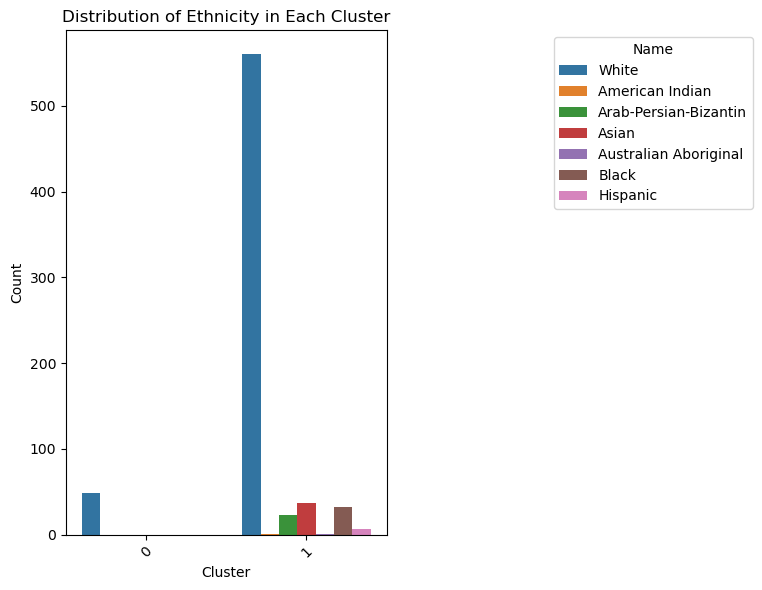

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='clusters', y='counts', hue='Skin Color', data= df_cluster)
plt.title('Distribution of Ethnicity in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Name', bbox_to_anchor=(1.5, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
# no meaningful result when we use kmeans with tfidf, now we work with sentiment analysis

In [16]:
#NLP libraries
import spacy, nltk, gensim, sklearn


#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
df['Positive_rate'] = [0 for i in range(len(df))]
df['Negative_rate'] = [0 for i in range (len(df))]
df['Compound_rate'] = [0 for i in range (len(df))]
df

/Users/mathisayma_1/anaconda3/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


,People,Skin Color,Positive_rate,Negative_rate,Compound_rate
0,%C3%93engus_I_of_the_Picts,White,0,0,0
1,Abbas_I_of_Persia,Arab-Persian-Bizantin,0,0,0
2,Adam_Smith,White,0,0,0
3,Adriaen_van_der_Donck,White,0,0,0
4,Agamemnon,White,0,0,0
...,...,...,...,...,...
706,Jimmy_Wales,White,0,0,0
707,Linus_Torvalds,White,0,0,0
708,Richard_Stallman,White,0,0,0
709,Tim_Berners-Lee,White,0,0,0


In [17]:
df['Positive_rate'] = [0 for i in range(len(df))]
df['Negative_rate'] = [0 for i in range (len(df))]
df['Compound_rate'] = [0 for i in range (len(df))]
analyzer = SentimentIntensityAnalyzer()
for i in range(len(corpus)):
    with  open(corpus[i]) as page:
        page_score = analyzer.polarity_scores(page.read())
        df['Positive_rate'].iloc[i] = page_score.get('pos')
        df['Negative_rate'].iloc[i] = page_score.get('neg')
        df['Compound_rate'].iloc[i] = page_score.get('compound')


df.dropna()

/var/folders/y7/jy5_7zhn0zj995826c8zbsfc0000gp/T/ipykernel_77910/3873592364.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positive_rate'].iloc[i] = page_score.get('pos')
/var/folders/y7/jy5_7zhn0zj995826c8zbsfc0000gp/T/ipykernel_77910/3873592364.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.039' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['Positive_rate'].iloc[i] = page_score.get('pos')
/var/folders/y7/jy5_7zhn0zj995826c8zbsfc0000gp/T/ipykernel_77910/3873592364.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,People,Skin Color,Positive_rate,Negative_rate,Compound_rate
0,%C3%93engus_I_of_the_Picts,White,0.039,0.090,-0.9986
1,Abbas_I_of_Persia,Arab-Persian-Bizantin,0.101,0.063,0.9935
2,Adam_Smith,White,0.159,0.058,0.9999
3,Adriaen_van_der_Donck,White,0.085,0.072,0.9619
4,Agamemnon,White,0.066,0.114,-0.9985
...,...,...,...,...,...
706,Jimmy_Wales,White,0.079,0.014,0.9986
707,Linus_Torvalds,White,0.092,0.019,0.9977
708,Richard_Stallman,White,0.138,0.058,0.9999
709,Tim_Berners-Lee,White,0.086,0.010,0.9981


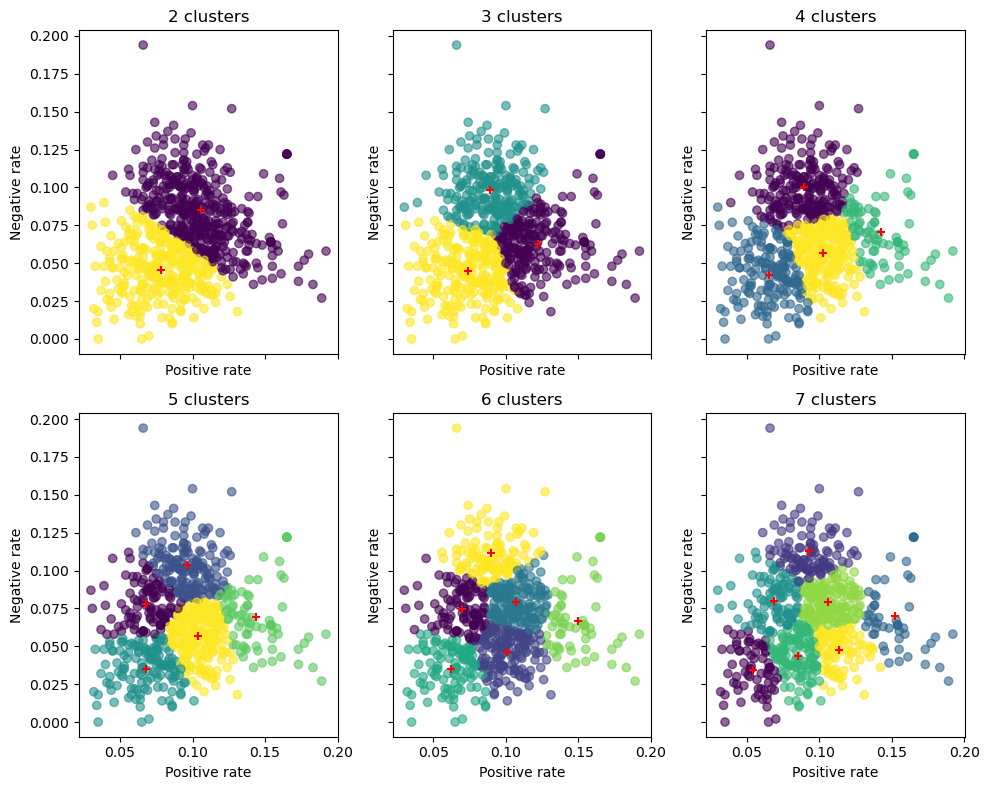

In [80]:
import math
MIN_CLUSTERS = 2
MAX_CLUSTERS = 8

COLUMNS = 3
ROWS = math.ceil((MAX_CLUSTERS-MIN_CLUSTERS)/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(10,8), sharey=True, sharex=True)
for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS):
    current_column = (n_clusters-MIN_CLUSTERS)%COLUMNS
    current_row = (n_clusters-MIN_CLUSTERS)//COLUMNS
    # Get the axis where to add the plot
    ax = axs[current_row, current_column]
    # Cluster the data with the current number of clusters
    kmean = KMeans(n_clusters=n_clusters, random_state=42, max_iter= 100, n_init=30).fit(df[['Positive_rate', 'Negative_rate']])
    # Plot the data by using the labels as color
    ax.scatter(df['Positive_rate'], df['Negative_rate'], c=kmean.labels_, alpha=0.6)
    ax.set_title("%s clusters"%n_clusters)
    ax.set_xlabel("Positive rate")
    ax.set_ylabel("Negative rate")
    # Plot the centroids
    for c in kmean.cluster_centers_:
        ax.scatter(c[0], c[1], marker="+", color="red")

plt.tight_layout()



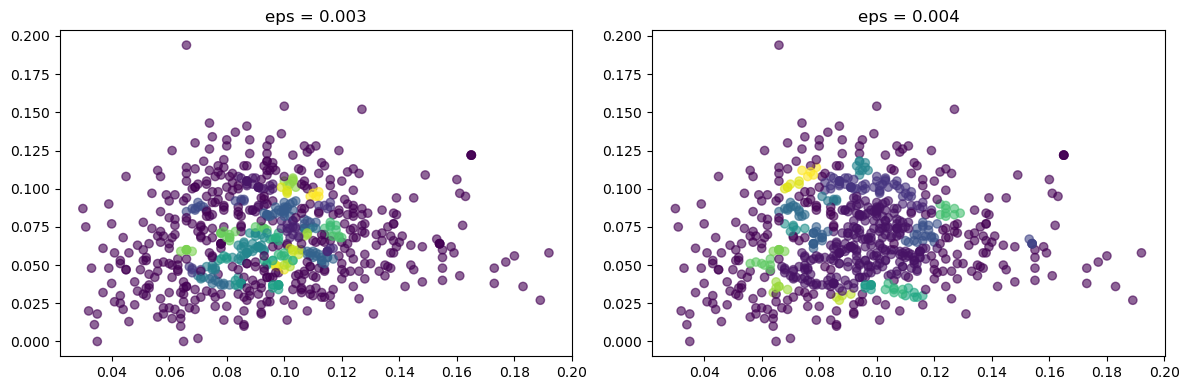

In [84]:
from sklearn.cluster import DBSCAN

eps1= 0.003
eps2 = 0.004

# Compute number of row and columns

fig, axs = plt.subplots(1,2,figsize=(12, 4))
ax = axs[0] 
labels = DBSCAN(eps=eps1).fit_predict(df[['Positive_rate', 'Negative_rate']])
ax.scatter(df['Positive_rate'], df['Negative_rate'], c=labels, alpha=0.6)
ax.set_title("eps = {:.3f}".format(eps1))

ax = axs[1]
labels = DBSCAN(eps=eps2).fit_predict(df[['Positive_rate', 'Negative_rate']])
ax.scatter(df['Positive_rate'], df['Negative_rate'], c=labels, alpha=0.6)
ax.set_title("eps = {:.3f}".format(eps2))
plt.tight_layout()

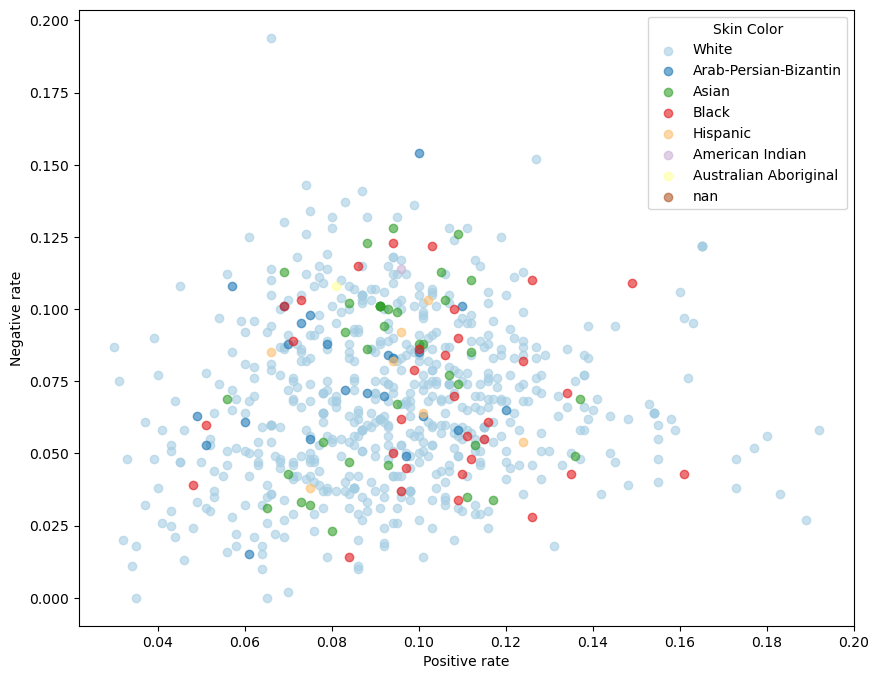

In [19]:
unique_skin_colors = df['Skin Color'].unique()
num_colors = len(unique_skin_colors)
color_map = plt.get_cmap('Paired', num_colors)  # Vous pouvez choisir une autre colormap si vous le souhaitez
# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 8))

# Assigner une couleur différente à chaque valeur de 'Skin Color' en utilisant la colormap
colors = [color_map(i) for i in np.linspace(0, 1, num_colors)]
for i, skin_color in enumerate(unique_skin_colors):
    subset = df[df['Skin Color'] == skin_color]
    ax.scatter(subset['Positive_rate'], subset['Negative_rate'], label=skin_color, c=[colors[i]], alpha=0.6)

# Définir les étiquettes des axes
ax.set_xlabel("Positive rate")
ax.set_ylabel("Negative rate")

# Ajouter une légende
ax.legend(title='Skin Color')

# Afficher le graphique
plt.show()


In [20]:
df['Skin Color'] = df['Skin Color'].apply(lambda x: 'Others' if x != 'White' else x)
df[['Skin Color', 'Positive_rate', 'Negative_rate', 'Compound_rate']].groupby(by = ['Skin Color']).mean()

,Positive_rate,Negative_rate,Compound_rate
Skin Color,,,
Others,0.093854,0.074942,0.235663
White,0.094171,0.067306,0.487937


In [21]:
df[['Skin Color', 'Positive_rate', 'Negative_rate', 'Compound_rate']].groupby(by = ['Skin Color']).std()

,Positive_rate,Negative_rate,Compound_rate
Skin Color,,,
Others,0.022310,0.029566,0.953433
White,0.027663,0.028071,0.848896


In [22]:
#negative rate of ethnicity other than White is larger than negative rate of White enthnicity
#statistic test to see if the p value is meaninful



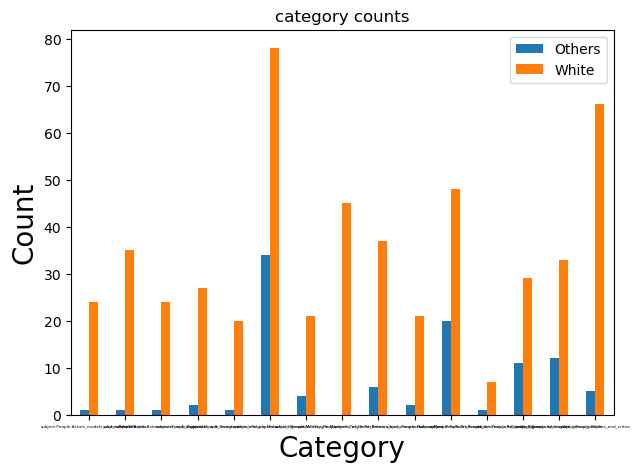

In [23]:
people_skin_color['People'].map(lambda x : unquote(x,'utf-8'))
people_skin_color
#a cofounder for rate ~ ethnicity can be category , let's visualize the différence between 

white_skin_color = people_skin_color.loc[people_skin_color['Skin Color'] == 'White']
other_skin_color = people_skin_color.loc[people_skin_color['Skin Color'] != 'White']

white_skin_color = white_skin_color[['Category','Skin Color']].groupby(['Category'], as_index = False).count()
other_skin_color = other_skin_color[['Category','Skin Color']].groupby(['Category'], as_index= False).count()
other_skin_color.columns = ['Category', 'Others']
white_skin_color.columns = ['Category', 'White']
category_df = other_skin_color.merge(white_skin_color, how='left', left_on=['Category'], right_on=['Category'])
category_df.index = category_df['Category']
pl = category_df.plot(kind='bar', figsize=[7,5], rot=0)
pl.set_title('category counts')
pl.set_ylabel('Count')
pl.set_xlabel('Category')
plt.xlabel('Category', fontsize=20)
plt.xticks(fontsize = 3)
plt.ylabel('Count', fontsize = 20)
plt.show()

In [24]:
#remove cofounder category, we should try to match only white and other with same category : (sport player, politician,...)
import networkx as nx
#first we need to define a distance function for EXACT matching
def get_similarity(category_a, category_b):
    if (category_a.item() == category_b.item()): 
        return 1 
    else: 
        return 0    



In [25]:
#Create a bipartite graph(G = AUB) with A = papers with rebutal,
# and B = papers without rebutal and edges = similarity between nodes
a = people_skin_color[people_skin_color['Skin Color'] == 'White']
b = people_skin_color[people_skin_color['Skin Color'] != 'White']


G = nx.Graph()

for i in a[['Category']].iterrows(): 
    category_a = i[1]
    for  j in b [['Category']].iterrows():
        category_b = j[1]
        similarity = get_similarity(category_a, category_b)
        if (similarity == 1):
            G.add_weighted_edges_from([(i[0], j[0], similarity)])

In [26]:
# the layout of the matching is : row[n] is matched with row[n+1] 
matching = nx.min_weight_matching(G)
matched = list()
for i in matching: 
    matched = matched + [i[0]] + [i[1]]

In [27]:
matched_df = df.iloc[matched]
matched_df

,People,Skin Color,Positive_rate,Negative_rate,Compound_rate
78,Rudolf_Vrba,White,0.072,0.088,-0.9996
77,Rosa_Parks,Others,0.100,0.086,0.9991
355,Pope_John_Paul_II,White,0.107,0.080,0.9998
343,John_Sentamu,Others,0.048,0.039,0.6597
64,Louis_XIV_of_France,White,0.109,0.078,0.9999
...,...,...,...,...,...
162,Diego_Maradona,Others,0.124,0.054,0.9999
419,Robert_Gascoyne-Cecil%2C_3rd_Marquess_of_Salis...,White,0.066,0.054,0.9658
407,Mahatma_Gandhi,Others,0.109,0.126,-0.9997
94,William_Edington,White,0.077,0.039,0.9831


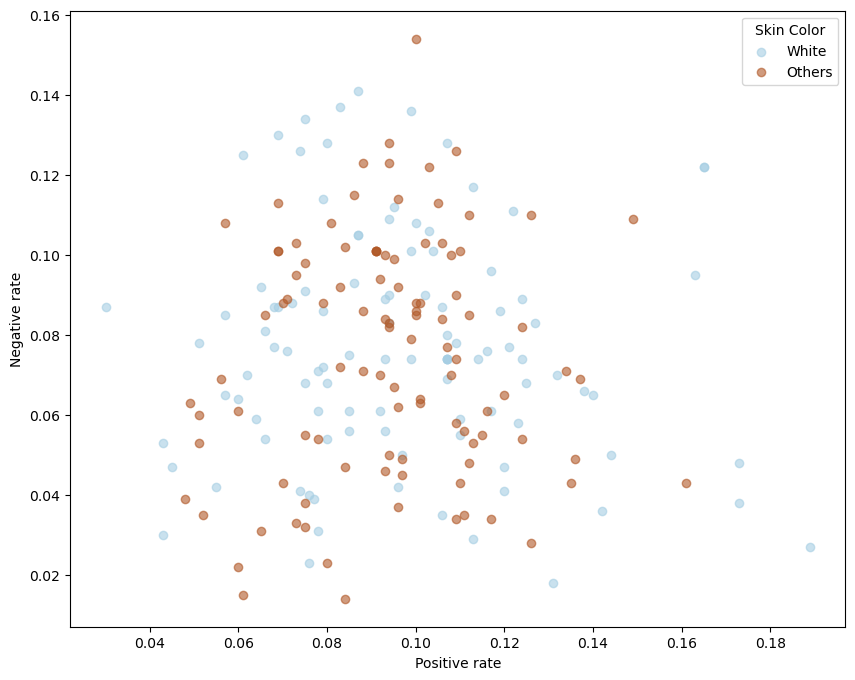

In [28]:
unique_skin_colors = matched_df['Skin Color'].unique()
num_colors = len(unique_skin_colors)
color_map = plt.get_cmap('Paired', num_colors)  # Vous pouvez choisir une autre colormap si vous le souhaitez
# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 8))

# Assigner une couleur différente à chaque valeur de 'Skin Color' en utilisant la colormap
colors = [color_map(i) for i in np.linspace(0, 1, num_colors)]
for i, skin_color in enumerate(unique_skin_colors):
    subset = matched_df[matched_df['Skin Color'] == skin_color]
    ax.scatter(subset['Positive_rate'], subset['Negative_rate'], label=skin_color, c=[colors[i]], alpha=0.6)

# Définir les étiquettes des axes
ax.set_xlabel("Positive rate")
ax.set_ylabel("Negative rate")

# Ajouter une légende
ax.legend(title='Skin Color')

# Afficher le graphique
plt.show()

In [29]:
matched_df['Skin Color'] = matched_df['Skin Color'].apply(lambda x: 'Others' if x != 'White' else x)
matched_df[['Skin Color', 'Positive_rate', 'Negative_rate', 'Compound_rate']].groupby(by = ['Skin Color']).mean()

/var/folders/y7/jy5_7zhn0zj995826c8zbsfc0000gp/T/ipykernel_77910/2708400574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_df['Skin Color'] = matched_df['Skin Color'].apply(lambda x: 'Others' if x != 'White' else x)


,Positive_rate,Negative_rate,Compound_rate
Skin Color,,,
Others,0.093854,0.074942,0.235663
White,0.096573,0.076796,0.259491


In [30]:
matched_df[['Skin Color', 'Positive_rate', 'Negative_rate', 'Compound_rate']].groupby(by = ['Skin Color']).std()

,Positive_rate,Negative_rate,Compound_rate
Skin Color,,,
Others,0.022310,0.029566,0.953433
White,0.030389,0.028615,0.941858


In [31]:
#resultat quasiment similaire
# We can maybe reply : Using the matched sample, estimate the following linear regression: negative rate ~ ethnicity.
#but won't be relevant at all, therefore maybe just use the rate for matching !!!!

In [32]:
#Try the same analysis but with a different Sentiment Analyser

#!conda install pytorch::pytorch torchvision torchaudio -c pytorch
#!conda install -c conda-forge transformers

In [33]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [34]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [35]:
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')


In [36]:
corpus_of_matched_people = matched_df['People'].apply(lambda x : dataFolder+x+'.txt')
corpus_of_matched_people

78         ../../Data/plaintext_articles/Rudolf_Vrba.txt
77          ../../Data/plaintext_articles/Rosa_Parks.txt
355    ../../Data/plaintext_articles/Pope_John_Paul_I...
343       ../../Data/plaintext_articles/John_Sentamu.txt
64     ../../Data/plaintext_articles/Louis_XIV_of_Fra...
                             ...                        
162     ../../Data/plaintext_articles/Diego_Maradona.txt
419    ../../Data/plaintext_articles/Robert_Gascoyne-...
407     ../../Data/plaintext_articles/Mahatma_Gandhi.txt
94     ../../Data/plaintext_articles/William_Edington...
46      ../../Data/plaintext_articles/Hannibal_Barca.txt
Name: People, Length: 206, dtype: object

In [37]:
results = list()
for i in range(103):
    with  open(corpus_of_matched_people.iloc[i]) as page:
        page_token = tokenizer.encode(page.read()[0:1024], padding=True, truncation= True, max_length=512, return_tensors='pt')
        result = model(page_token)
        results.append(result.logits)
        
results

[tensor([[-0.1529, -0.1273,  0.1926,  0.3707, -0.0602]],
        grad_fn=<AddmmBackward0>),
 tensor([[ 0.4258,  0.1942,  0.1473,  0.0460, -0.5658]],
        grad_fn=<AddmmBackward0>),
 tensor([[ 0.4431, -0.0423,  0.1855, -0.0712, -0.3008]],
        grad_fn=<AddmmBackward0>),
 tensor([[ 0.4227,  0.1118,  0.2939, -0.0427, -0.5558]],
        grad_fn=<AddmmBackward0>),
 tensor([[ 0.0511, -0.1005,  0.3432,  0.1551, -0.2085]],
        grad_fn=<AddmmBackward0>),
 tensor([[ 0.3006,  0.3807,  0.4884,  0.0944, -0.9568]],
        grad_fn=<AddmmBackward0>),
 tensor([[-0.0580,  0.0377,  0.3392,  0.2645, -0.4521]],
        grad_fn=<AddmmBackward0>),
 tensor([[ 0.1095,  0.0836,  0.2949,  0.1667, -0.3898]],
        grad_fn=<AddmmBackward0>),
 tensor([[-0.0045,  0.5936,  0.7679,  0.1523, -1.0706]],
        grad_fn=<AddmmBackward0>),
 tensor([[-0.4229, -0.2781,  0.2220,  0.5295,  0.1297]],
        grad_fn=<AddmmBackward0>),
 tensor([[-1.0878, -0.1171,  0.7483,  0.8761, -0.0602]],
        grad_fn=<AddmmB

In [38]:
data = [tensor.flatten().tolist() for tensor in results]
bert_df = pd.DataFrame(data, columns=['one_star', 'two_star','three_star','four_star','five_star'])
bert_df

,one_star,two_star,three_star,four_star,five_star
0,-0.152941,-0.127286,0.192592,0.370700,-0.060203
1,0.425771,0.194180,0.147253,0.045961,-0.565788
2,0.443068,-0.042277,0.185532,-0.071184,-0.300782
3,0.422728,0.111796,0.293913,-0.042682,-0.555804
4,0.051113,-0.100539,0.343199,0.155069,-0.208542
...,...,...,...,...,...
98,-0.219532,-0.014827,0.331935,0.450127,-0.270266
99,-0.050460,-0.092693,0.396280,0.417571,-0.433499
100,0.607802,-0.002104,-0.021656,-0.152647,-0.319824
101,0.786889,0.050795,0.025633,-0.303275,-0.485475


In [39]:
from sklearn.decomposition import PCA
bert_reduced_pca = PCA(n_components=2).fit(bert_df).transform(bert_df)
bert_reduced_pca = pd.DataFrame(bert_reduced_pca, columns=['first_component', 'second_component'])
bert_reduced_pca

,first_component,second_component
0,0.379871,-0.090009
1,-0.501516,0.038881
2,-0.374266,-0.241325
3,-0.501385,0.048968
4,0.072571,-0.043126
...,...,...
98,0.343576,0.200246
99,0.167793,0.229806
100,-0.560487,-0.395961
101,-0.842179,-0.352391


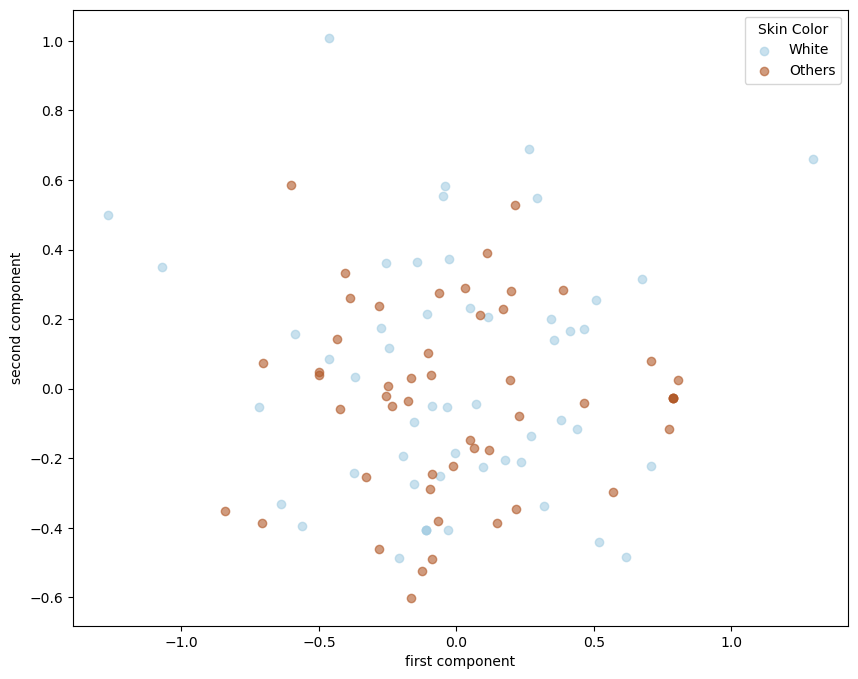

In [48]:
unique_skin_colors = ['White', 'Others']
num_colors = 2 #white and others
color_map = plt.get_cmap('Paired', num_colors)  # Vous pouvez choisir une autre colormap si vous le souhaitez
# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 8))

# Assigner une couleur différente à chaque valeur de 'Skin Color' en utilisant la colormap
colors = [color_map(i) for i in np.linspace(0, 1, num_colors)]
for i, skin_color in enumerate(unique_skin_colors):
    subset = bert_reduced_pca[bert_reduced_pca.index %2 == i]
    ax.scatter(subset['first_component'], subset['second_component'], label=skin_color, c=[colors[i]], alpha=0.6)

# Définir les étiquettes des axes
ax.set_xlabel("first component")
ax.set_ylabel("second component")

# Ajouter une légende
ax.legend(title='Skin Color')

# Afficher le graphique
plt.show()